In [600]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import t,norm,chi2,f
from scipy.stats import ttest_1samp

from plot import setup_mpl
setup_mpl(as_default=0)

## distributions

(-0.05, 1.05)

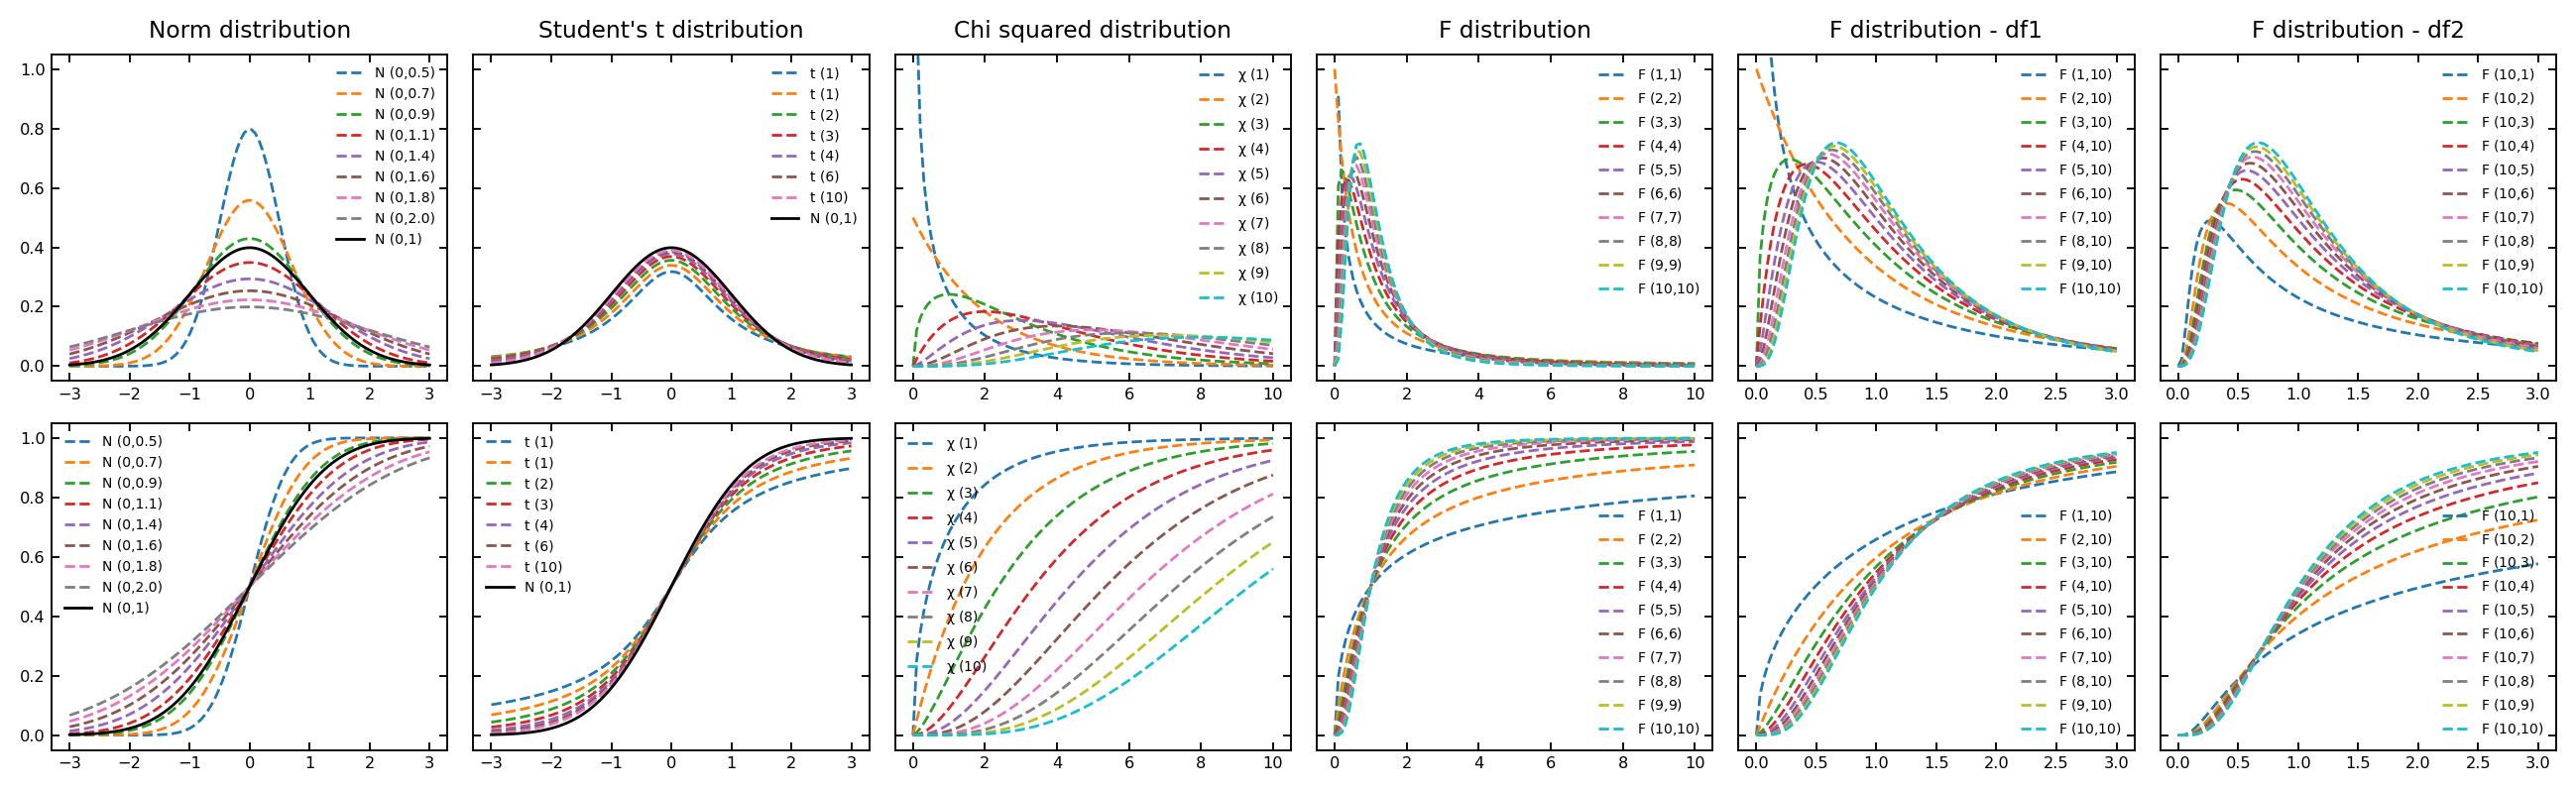

In [329]:
i = 6
fig,ax = plt.subplots(2,i,figsize=(13,4), dpi=200, sharey=True)
ax = ax.flatten()
x = np.linspace(-3,3,100)

# norm distribution =============================
loc = 0
for s in np.linspace(0.5,2,8):
    ax[loc].plot(x, norm.pdf(x,scale=s),'--',label=f'N (0,{round(s,1)})',lw=1)
    ax[i+loc].plot(x, norm.cdf(x,scale=s),'--',label=f'N (0,{round(s,1)})',lw=1)
ax[loc].plot(x, norm.pdf(x),'k',label=f'N (0,1)',lw=1)
ax[loc].legend(fontsize=5,frameon=False)

ax[i+loc].plot(x, norm.cdf(x),'k',label=f'N (0,1)',lw=1)
ax[i+loc].legend(fontsize=5,frameon=False)
ax[loc].set_title('Norm distribution')

## t dis =============================================
loc = 1
dfs= np.logspace(0,1,7)
for df in dfs:
    ax[loc].plot(x, t.pdf(x,df),'--',label=f't ({int(df)})',lw=1)
    ax[i+loc].plot(x, t.cdf(x,df),'--',label=f't ({int(df)})',lw=1)
    
ax[loc].plot(x, norm.pdf(x,loc=0,scale=1),'k',label=f'N (0,1)',lw=1)
ax[loc].legend(fontsize=5,frameon=False)
ax[i+loc].plot(x, norm.cdf(x),'k',label=f'N (0,1)',lw=1)
ax[i+loc].legend(fontsize=5,frameon=False)
ax[loc].set_title('Student\'s t distribution')

## chi dis ==========================================================
loc = 2
ks = np.linspace(1,10,10)
x = np.linspace(0,10,100)
for k in ks:
    ax[loc].plot(x, chi2.pdf(x,df=k),'--',label=f'$\chi$ ({int(k)})',lw=1)
    ax[i+loc].plot(x, chi2.cdf(x,df=k),'--',label=f'$\chi$ ({int(k)})',lw=1)

ax[loc].legend(fontsize=5,frameon=False)
ax[i+loc].legend(fontsize=5,frameon=False)
ax[loc].set_title('Chi squared distribution')

## f dis =============================================================
loc = 3
df1s = np.linspace(1,10,10)
df2s = np.linspace(1,10,10)
x = np.linspace(0,10,100)

for df1,df2 in zip(df1s,df2s):
    ax[loc].plot(x, f.pdf(x,dfn=df1,dfd=df2),'--',label=f'$F$ ({int(df1)},{int(df2)})',lw=1)
    ax[i+loc].plot(x, f.cdf(x,dfn=df1, dfd=df2),'--',label=f'$F$ ({int(df1)},{int(df2)})',lw=1)
ax[loc].legend(fontsize=5,frameon=False)
ax[i+loc].legend(fontsize=5,frameon=False)
ax[loc].set_title('F distribution')

## f dis =============================================================
loc = 4
df1s = np.linspace(1,10,10)
df2s = np.linspace(1,10,10)
x = np.linspace(0,3,100)
df2 = 10
for df1 in df1s:
    ax[loc].plot(x, f.pdf(x,dfn=df1,dfd=df2),'--',label=f'$F$ ({int(df1)},{int(df2)})',lw=1)
    ax[i+loc].plot(x, f.cdf(x,dfn=df1, dfd=df2),'--',label=f'$F$ ({int(df1)},{int(df2)})',lw=1)

ax[loc].legend(fontsize=5,frameon=False)
ax[i+loc].legend(fontsize=5,frameon=False)
ax[loc].set_title('F distribution - df1')

## f dis =============================================================
loc = 5
df1s = np.linspace(1,10,10)
df2s = np.linspace(1,10,10)
x = np.linspace(0,3,100)
df1 = 10
for df2 in df2s:
    ax[loc].plot(x, f.pdf(x,dfn=df1,dfd=df2),'--',label=f'$F$ ({int(df1)},{int(df2)})',lw=1)
    ax[i+loc].plot(x, f.cdf(x,dfn=df1, dfd=df2),'--',label=f'$F$ ({int(df1)},{int(df2)})',lw=1)

ax[loc].legend(fontsize=5,frameon=False)
ax[i+loc].legend(fontsize=5,frameon=False)
ax[loc].set_title('F distribution - df2')
##
ax[1].set_ylim(-0.05,1.05)

In [483]:
norm.rvs()

-0.2398078944878307

## T分布的生成

In [657]:
def gen_norm_dis_samples(n,seed=None):
    ## generate norm distribution samples
    rng = np.random.default_rng(seed=seed)
    rvs = stats.norm.rvs(size=n, random_state=rng)
    return rvs 

def get_chi2_dis_samples(n, df=5,seed=None):
    rng = np.random.default_rng(seed=seed)
    rvs = stats.chi2.rvs(size=n, df=df, random_state=rng)
    return rvs

def get_t_dis_samples(n, df=5,seed=None):
    rng = np.random.default_rng(seed=seed)
    rvs = stats.t.rvs(size=n, df=df, random_state=rng)
    return rvs

def chi2_stat(x):
    y = np.sum(np.power(x,2))
    return y

def t_stat(x, n=50):
    y = chi2_stat(x)
    rv = x/np.sqrt(y/(n-1))
    return rv

def t_value(x, mu=100):
    n=x.shape[0]
    bar_x = np.mean(x)
    var = np.sum(np.power(x-bar_x,2))
    s = np.sqrt(var/(n-1))
    t_value = (bar_x - mu)*np.sqrt(n)/s
    return t_value

### t distribution arises

- a continuously distributed population with expected value $\mu$ 
- $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$
- 当n >30 t分布拟合误差很大
- 连续分布就能抽出t分布？
    - 不行，只有正态才行

fitting df: 4.349173818022706, theory df: 4


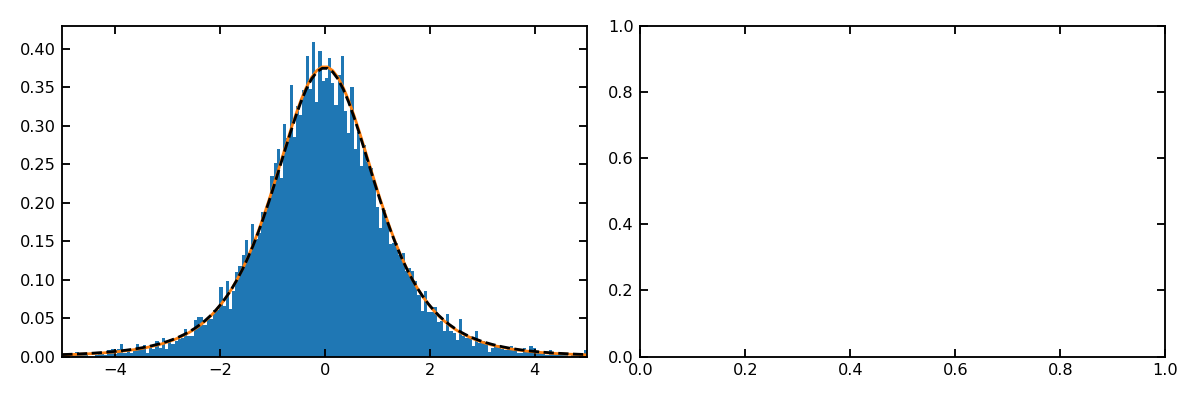

In [619]:
# 生成groups组，每组n_samples个的样本
n_samples = 5
groups = 10000
samples = np.apply_along_axis(func1d = gen_norm_dis_samples, axis = 1, arr = np.array([[n_samples for i in range(groups)]]).T , )

# 对每组样本计算t统计量
arr_t_value = np.apply_along_axis(func1d = t_value, axis = 1, arr = samples)

# 绘制t统计量的直方图
fig,ax = plt.subplots(1,2,figsize=(6,2),dpi=200)
counts, bins, bars = ax[0].hist(arr_t_value ,bins=500, density=True)

# 计算pdf参数
df, _, _ = stats.t.fit(arr_t_value,)
print(f'fitting df: {df}, theory df: {n_samples-1}')

# # 根据拟合参数绘制pdf曲线
x = np.linspace(-5, 5, 100)
ax[0].plot(x, t.pdf(x, df=df))
ax[0].set_xlim(-5, 5)
ax[0].plot(x, t.pdf(x, df=n_samples-1),'--k')

### chi2 distribution arises

fitting df: 99.95244140625016


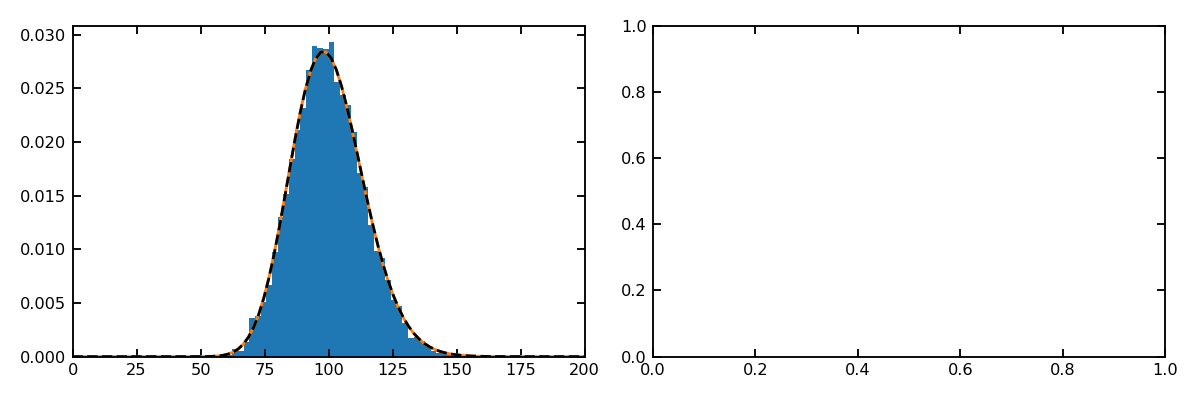

In [554]:
# 生成100组，每组十个的样本
samples = np.apply_along_axis(func1d = gen_norm_dis_samples, axis = 1, arr = np.array([[100 for i in range(10000)]]).T , )

# 对每组样本计算chi2统计量
arr_chi2 = np.apply_along_axis(func1d = chi2_stat, axis = 1, arr = samples)

# 绘制chi统计量的直方图
fig,ax=plt.subplots(1,2,figsize=(6,2),dpi=200)
counts, bins, bars = ax[0].hist(arr_chi2 ,bins=50, density=True)

# 计算pdf 参数
df, _, _ = chi2.fit(arr_chi2,floc = 0, fscale=1) # hold location parameter fixed
print(f'fitting df: {df}')

# # 根据拟合参数绘制pdf曲线
x = np.linspace(0, 200, 100)
ax[0].plot(x, chi2.pdf(x,df=df, loc=loc, scale=scale))
ax[0].set_xlim(0, 200)
ax[0].plot(x, chi2.pdf(x,df=100),'--k')

### F distribution

In [670]:
df1 = 5
df2 = 10
n_samples = 1
groups = 10000
chi2_s1 = np.apply_along_axis(func1d = get_chi2_dis_samples, axis = 1, arr = np.array([[n_samples for i in range(groups)]]).T , df=df1)
chi2_s2 = np.apply_along_axis(func1d = get_chi2_dis_samples, axis = 1, arr = np.array([[n_samples for i in range(groups)]]).T , df=df2)

arr = np.stack([chi2_s1,chi2_s2],axis=1)[:,:,0]

In [671]:
def y_f(x):
    return (x[0]/df1)/(x[1]/df2)

# 对每组样本计算chi2统计量
arr_f = np.apply_along_axis(func1d = y_f, axis = 1, arr = arr)

fitting df: 4.398306824357402


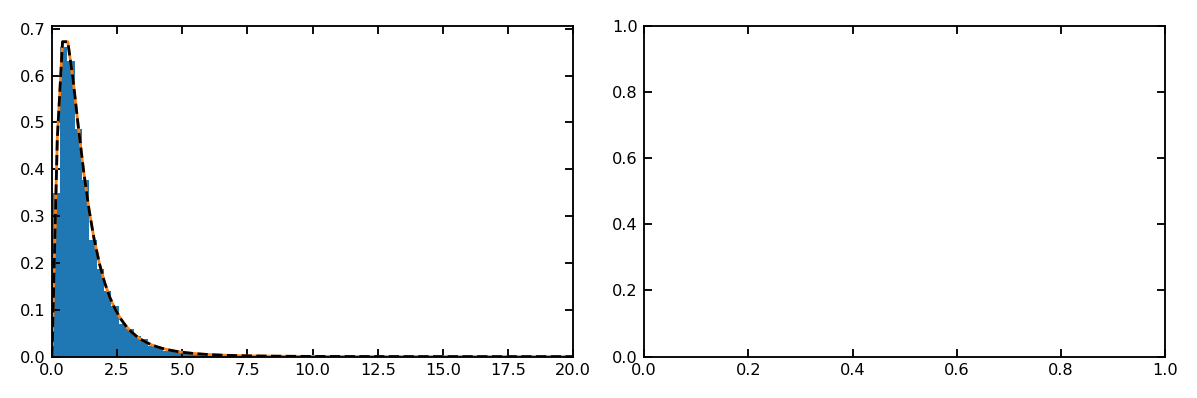

In [679]:
# 绘制chi统计量的直方图
fig,ax=plt.subplots(1,2,figsize=(6,2),dpi=200)
counts, bins, bars = ax[0].hist(arr_f ,bins=50, density=True)

# 计算pdf 参数
df1, df2, _, _ = f.fit(arr_f,) # hold location parameter fixed
print(f'fitting df: {df}')

# # 根据拟合参数绘制pdf曲线
x = np.linspace(0, 20, 100)
ax[0].plot(x, f.pdf(x, dfn=df1,dfd=df2, loc=loc, scale=scale))
ax[0].set_xlim(0, 20)
ax[0].plot(x, f.pdf(x,dfn=df1,dfd=df2),'--k')

## T-test

In [127]:
t.stats(6, moments='mvsk')

(array(0.), array(1.5), array(0.), array(3.))

In [120]:
dat = sm.datasets.get_rdataset("Guerry", "HistData")
# print(dat.__doc__)

In [12]:
dat.data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [36]:
np.logspace(1,2,10)

12.91549665014884

In [ ]:
norm.stats(moments='mvsk')

(array(0.), array(1.), array(0.), array(0.))

In [74]:
norm.fit([1,2,3])

(2.0, 0.816496580927726)

In [104]:
from scipy import stats
rng = np.random.default_rng()
rvs = stats.uniform.rvs(size=50, random_state=rng)
stats.ttest_1samp(rvs, popmean=0.5)

Ttest_1sampResult(statistic=-1.8443498438428818, pvalue=0.071182006393096)